# 군집 분석

## - 불러올 패키지 목록

In [17]:
# 데이터 핸들링을 위한 패키지
import numpy as np
import pandas as pd

# 사이킷런 패키지
from sklearn.preprocessing import *  # 데이터 전처리를 위한 패키지
from sklearn.model_selection import *  # 데이터 분리, 검증 및 파라미터 튜닝을 위한 패키지
from sklearn.metrics import *  # 모델에 대한 다양한 성능 평가를 위한 패키지


from sklearn.cluster import *  # 비지도 군집화 알고리즘 제공
from sklearn.tree import *  # 의사결정나무 알고리즘 제공
from sklearn.ensemble import *  # 앙상블 알고리즘 제공

# 사이파이 패키지
from scipy.cluster.hierarchy import *  # 계층적 군집 분석을 위한 패키지

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 시각화를 위한 패키지
from matplotlib import pyplot as plt
import seaborn as sb
# %matplotlib inline 의 목적은 plt.show()함수가 호출되지 않은 경우에도 matplotlib 다이어그램을 렌더링하는 것이다.
# 그러나 현재 업데이트된 버전의 주피터 노트북 버전에서는 %matplotlib inline 를 사용하지 않더라도 Matplotlib 다이어그램을 개체로 표현한다.
# 따라서 굳이 필요하지는 않다. 그러나 코드를 깨끗하게 유지하고 자신이 만든 플롯을 호출하기 위해 여전히 관례적으로 권장된다.
%matplotlib inline

# label별 데이터 카운트를 위한 모듈
from collections import Counter  # https://docs.python.org/3/library/collections.html

# 계층적 군집 분석
-  `scipy.cluster.hierarchy`
- https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html

## 데이터 불러오기 및 전처리

In [47]:
df_house = pd.read_csv( 'C:\\Users\\Administrator\\GitHub\\TIL\\ADP_study\\rawdata\\kc_house_data.csv' )
df_house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [48]:
# 'date' 컬럼의 데이터 사용을 원활히 하기 위해, 년도를 나타내는 'date2' 컬럼 추가
df_house['date2'] = df_house['date'].apply( lambda x: x[0:4] )

# data2 컬럼의 데이터를 숫자로 변환하는 과정이 필요
df_house['date2'] = df_house['date2'].astype('int64')

# 집이 매각된 년도(date2)와 지어진 년도(yr_built)의 기간 차이를 나타내는 변수 추가
df_house['sold-build_years'] = df_house.apply( lambda x: ( (x['date2']) - (x['yr_built']) ), axis=1)

df_house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date2,sold-build_years
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,59
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,63
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,82
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,49
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,0,2009,0,98103,47.6993,-122.346,1530,1509,2014,5
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,0,2014,0,98146,47.5107,-122.362,1830,7200,2015,1
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,0,2009,0,98144,47.5944,-122.299,1020,2007,2014,5
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,0,2004,0,98027,47.5345,-122.069,1410,1287,2015,11


## x값(예측변수), y값(목표변수) 설정

In [49]:
data

,bathrooms,sqft_living,waterfront,view,sold-build_years
0,1.00,1180,0,0,59
1,2.25,2570,0,0,63
2,1.00,770,0,0,82
3,3.00,1960,0,0,49
4,2.00,1680,0,0,28
...,...,...,...,...,...
495,2.50,1230,0,0,10
496,2.00,2110,0,0,90
497,2.75,3080,0,2,56
498,1.50,1490,0,0,114


In [50]:
# 데이터의 숫자가 너무 많으므로 복원추출로 500개 행만 추출하여 분석

df_house = df_house.iloc[0:500]
df_house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date2,sold-build_years
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,59
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,63
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,82
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,49
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,9828702519,20140512T000000,490000.0,2,2.50,1230,1391,2.0,0,0,...,360,2004,0,98112,47.6192,-122.301,1240,1350,2014,10
496,4432600075,20150128T000000,725000.0,4,2.00,2110,4140,2.0,0,0,...,400,1925,2003,98116,47.5836,-122.387,1440,4420,2015,90
497,7806300030,20140917T000000,299000.0,3,2.75,3080,19635,1.0,0,2,...,1470,1958,0,98032,47.3841,-122.284,2424,12410,2014,56
498,9274202270,20140818T000000,625000.0,2,1.50,1490,5750,1.5,0,0,...,300,1900,0,98116,47.5872,-122.390,1590,4025,2014,114


In [51]:
data = df_house[ ['bedrooms', 'sqft_living', 'waterfront', 'view', 'sold-build_years'] ]
y = df_house['price']

## 계층적 군집 분석 수행

### 모델 생성 및 학습
- `sklearn.cluster.AgglomerativeClustering()`

- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

In [52]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model = cluster.fit_predict(data)

print("Cluster 1의 평균 가격(price): ", np.mean([x for x, y in zip(y, cluster.fit_predict(data)) if y == 0]))
print("Cluster 2의 평균 가격(price): ", np.mean([x for x, y in zip(y, cluster.fit_predict(data)) if y == 1]))  

Cluster 1의 평균 가격(price):  417325.8604060914
Cluster 2의 평균 가격(price):  927550.8962264151


In [40]:
print("Cluster 1의 평균 가격(price): ", np.mean([x for x, y in zip(y, model.fit_predict(x)) if y == 0]))
print("Cluster 2의 평균 가격(price): ", np.mean([x for x, y in zip(y, model.fit_predict(x)) if y == 1])) 

AttributeError: 'numpy.ndarray' object has no attribute 'fit_predict'

### 덴드로그램
- `scipy.cluster.hierarchy.linkage()`
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
-
- `scipy.cluster.hierarchy.dendrogram()`
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html

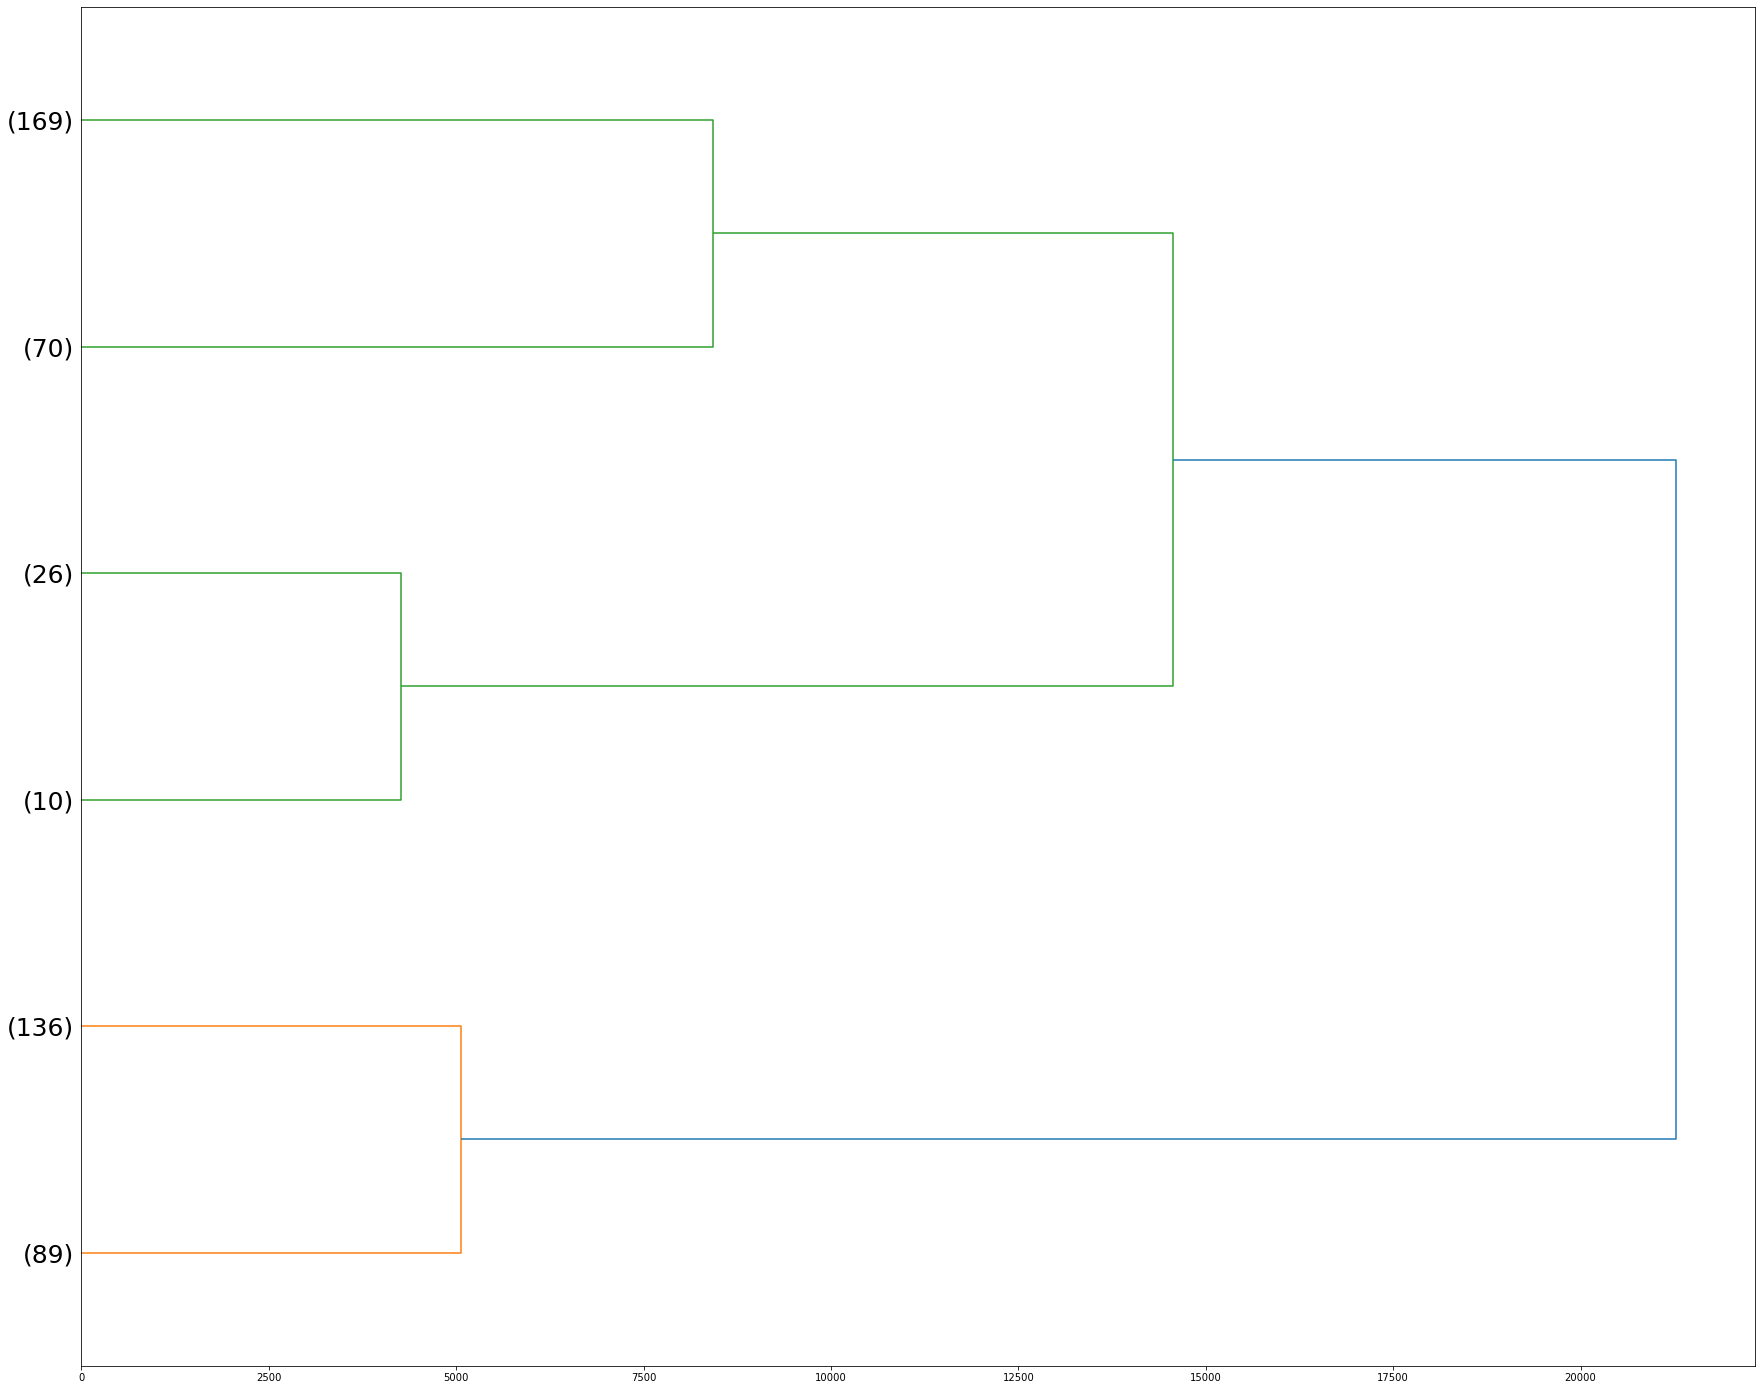

In [25]:
# 와드 연결법으로 군집화 수행
linked = linkage(x, 'ward')


# 덴드로그램 그리기

plt.figure( figsize=(30,25) )

dendrogram( linked,
            truncate_mode = 'lastp', p = 6,  # 6개 군집까지만 출력
            orientation = 'right',
            leaf_font_size = 25)

plt.show()

### 군집화 결과 확인
- `scipy.cluster.hierarchy.fcluster()`
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html

In [ ]:
linked

In [56]:
cut_tree = fcluster( data,
                     criterion = 'maxclust', t = 2 )
cut_tree

TypeError: Linkage matrix 'Z' must contain doubles.

In [54]:
df_result = pd.DataFrame( {'pred_group':cut_tree,
                           'price':y} )

pd.set_option('display.max_row', 50)  # 데이터프레임의 출력 행 개수 설정 (한 셀에 모든 행 표시가 안될 경우)

df_result.sort_values('pred_group')

,pred_group,price
0,1,221900.0
261,1,237000.0
260,1,780000.0
258,1,255000.0
257,1,315000.0
...,...,...
283,2,780000.0
282,2,2050000.0
280,2,304900.0
87,2,461000.0


In [55]:
df_result.groupby('pred_group').mean('price')

,price
pred_group,
1,362727.577778
2,658665.741818


In [ ]:
x = df_arrest
y = df_arrest.index

In [ ]:
# 단일 연결법: 주어진 군집의 관측치들의 거리를 계산

linked = linkage(x, 'single')
labels = y

plt.figure( figsize=(30,20) )

dendro = dendrogram(linked,
                    labels=y,
                    leaf_font_size = 20 )

plt.show()

In [ ]:
# 단일 연결법: 주어진 군집의 관측치들의 거리를 계산

linked = linkage(x, 'single')
labels = y

plt.figure( figsize=(30,20) )

dendro = dendrogram(linked,
                    labels=y,
                    truncate_mode = 'lastp', p = 6,
                    leaf_font_size = 20 )

plt.show()

In [ ]:
cut_tree = fcluster( linked, t = 6, criterion = 'maxclust')
cut_tree

In [ ]:
df = pd.DataFrame( {'pred':cut_tree,
                    'labels':y} )

df.sort_values('pred')

In [ ]:
# 최장 연결법: 주어진 군집의 관측치들의 거리를 계산

linked = linkage(x, 'complete')
labels = y

plt.figure( figsize=(30,20) )

dendro = dendrogram(linked,
                    labels=y,
                    truncate_mode = 'lastp', p = 6,
                    leaf_font_size = 20 )
plt.show()

In [ ]:
# 평균 연결법: 주어진 군집의 관측치들의 거리를 계산

linked = linkage(x, 'average')
labels = y

plt.figure( figsize=(30,20) )

dendro = dendrogram(linked,
                    labels=y,
                    truncate_mode = 'lastp', p = 6,
                    leaf_font_size = 20 )
plt.show()

In [ ]:
cut_tree = fcluster( linked, t = 6, criterion = 'maxclust')
cut_tree

In [ ]:
df = pd.DataFrame( {'pred':cut_tree,
                    'labels':y} )

df.sort_values('pred')

In [ ]:
# 와드 연결법: 주어진 군집의 관측치들의 거리를 계산

linked = linkage(x, 'ward')
labels = y

plt.figure( figsize=(30,20) )

dendrogram(linked,
           labels=y,
           leaf_font_size = 20 )
plt.show()

# 분할적 군집 분석

## k-means clustering

In [ ]:
# 데이터 핸들링을 위한 패키지
import numpy as np
import pandas as pd

# 사이킷런 패키지
from sklearn.metrics import *
from sklearn.cluster import *  # 그룹화를 위한 패키지
from sklearn.preprocessing import *  # 데이터 전처리를 위한 패키지
from sklearn.model_selection import *  # 데이터 분리, 검증 및 파라미터 튜닝을 위한 패키지
from sklearn.tree import *  # 의사결정나무 관련 패키지
from sklearn.ensemble import *

# 사이파이 패키지
from scipy.cluster.hierarchy import *

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 시각화를 위한 패키지
from matplotlib import pyplot as plt
import seaborn as sb
# %matplotlib inline 의 목적은 plt.show()함수가 호출되지 않은 경우에도 matplotlib 다이어그램을 렌더링하는 것이다.
# 그러나 현재 업데이트된 버전의 주피터 노트북 버전에서는 %matplotlib inline 를 사용하지 않더라도 Matplotlib 다이어그램을 개체로 표현한다.
# 따라서 굳이 필요하지는 않다. 그러나 코드를 깨끗하게 유지하고 자신이 만든 플롯을 호출하기 위해 여전히 관례적으로 권장된다.
%matplotlib inline

# label별 데이터 카운트를 위한 모듈
from collections import Counter  # https://docs.python.org/3/library/collections.html

### 데이터 셋(Dataset) 및 전처리

In [ ]:
df_iris = pd.read_csv('C:\\Users\\Administrator\\GitHub\\TIL\\ADP_study\\rawdata\\iris.csv',
                       index_col = 'Unnamed: 0')
df_iris

산점도 행렬
https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

In [ ]:
sb.pairplot( df_iris, hue = 'Species')

### k를 3으로 군집 개수 지정
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [ ]:
# k를 3개로 설정 

cluster = KMeans( n_clusters = 3,
                  max_iter = 300,
                  random_state = 0 )

# 2차원 평면상에서 시각화를 위해 2개의 속성만 사용
model = cluster.fit( df_iris[ ['Petal.Length','Petal.Width'] ] )

# 각각의 클러스터의 중심 확인
centers = model.cluster_centers_
print(centers)

In [ ]:
# 분류된 군집화 값 확인
model.labels_

In [ ]:
# iris 데이터프레임에 cluster에 대한 컬럼 추가하고 군집화 값 입력
df_iris['km_cluster'] = model.labels_

df_iris.groupby( ['Species', 'km_cluster'] ).count()

In [ ]:

# 실제 값과 군집화된 값들을 비교하여 
# 분류된 군집화 값들에 해당하는 Species 이름을 데이터프레임에 입력
df_iris['km_cluster'] = df_iris['km_cluster'].apply( lambda x: 'setosa' if 0 == x
                                                     else ('versicolor' if 2 == x
                                                     else 'virginica') )
df_iris.groupby( ['Species', 'km_cluster'] ).count()

In [ ]:
sb.pairplot( df_iris.loc[:, ['km_cluster', 'Petal.Length','Petal.Width']],
             hue="km_cluster",
             size=5,
             plot_kws=dict(s=50, linewidth=1) )

In [ ]:
sb.pairplot( df_iris,
             hue="Species",
             size=5,
             plot_kws=dict(s=50, linewidth=1) )

### 군집화를 위한 가상 데이터 생성


- 인수:
    - n_samples : 표본 데이터의 수
    - n_features : 독립 변수의 수
    - centers : 생성할 클러스터의 수 혹은 중심
    - cluster_std: 클러스터의 표준 편차

- 반환값:
    - X : [n_samples, n_features] 크기의 배열
    - 독립 변수
    - y : [n_samples] 크기의 배열
    - 종속 변수

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=200, n_features=2, centers=5, random_state=27)

df_k5 = pd.DataFrame(data=X, columns=['x1','x2'])
df_k5['target'] = y
df_k5.head()

In [ ]:
plt.scatter( df_k5['x1'], df_k5['x2'], marker='o', c=y, s=50,
            edgecolor="k")
plt.show()

# Mean Shift

# GMM (Gaussian Mixture Model)

# DBSCAN